In [2]:
#importing main data analysis libraries  
import pandas as pd 
import numpy as np
#importing main visualization libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline 

#set visualization settings
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (13, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [3]:
#read train dataset
train = pd.read_csv('C:/Users/Asus/Education/Portfolio_Projects/hr_promote_analysis/raw_data/train.csv')

In [7]:
train.head()
#looking at the head of the dataset, as we can see there are 14 categories, let's look what info() can do for us

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
train.info()
#so this is more interesting, but we can see, that there are only 50 684 values in previous_year_rating and 52399 in education,
#but we will explore it more in next step(data cleaning and feature engineering)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
train.describe()
#let's describe our int values, it can be useful, when we go to our graph

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [10]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [11]:
train = train.rename(columns= {'awards_won?':'awards_won'})
train_num = train.drop(['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel'], axis = 1)
#here we changed name and created new dataframe for numeric only values(we didn't drop 'is_promoted', because it would be
#useful for our pairplot graph)

### Numeric features connections
In this step we will look how our values connected between each other. For this we will use histograms, pairplots and heatmap.

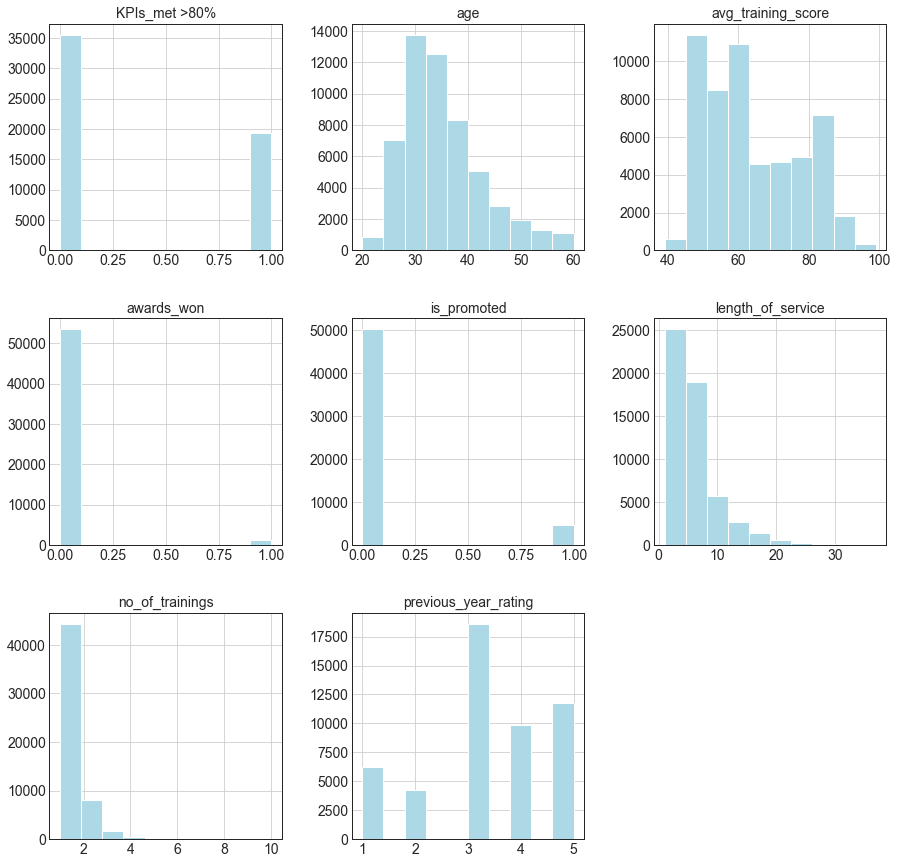

In [12]:
histograms_num = train_num.hist(figsize= (15, 15), color = 'lightblue')
plt.show()


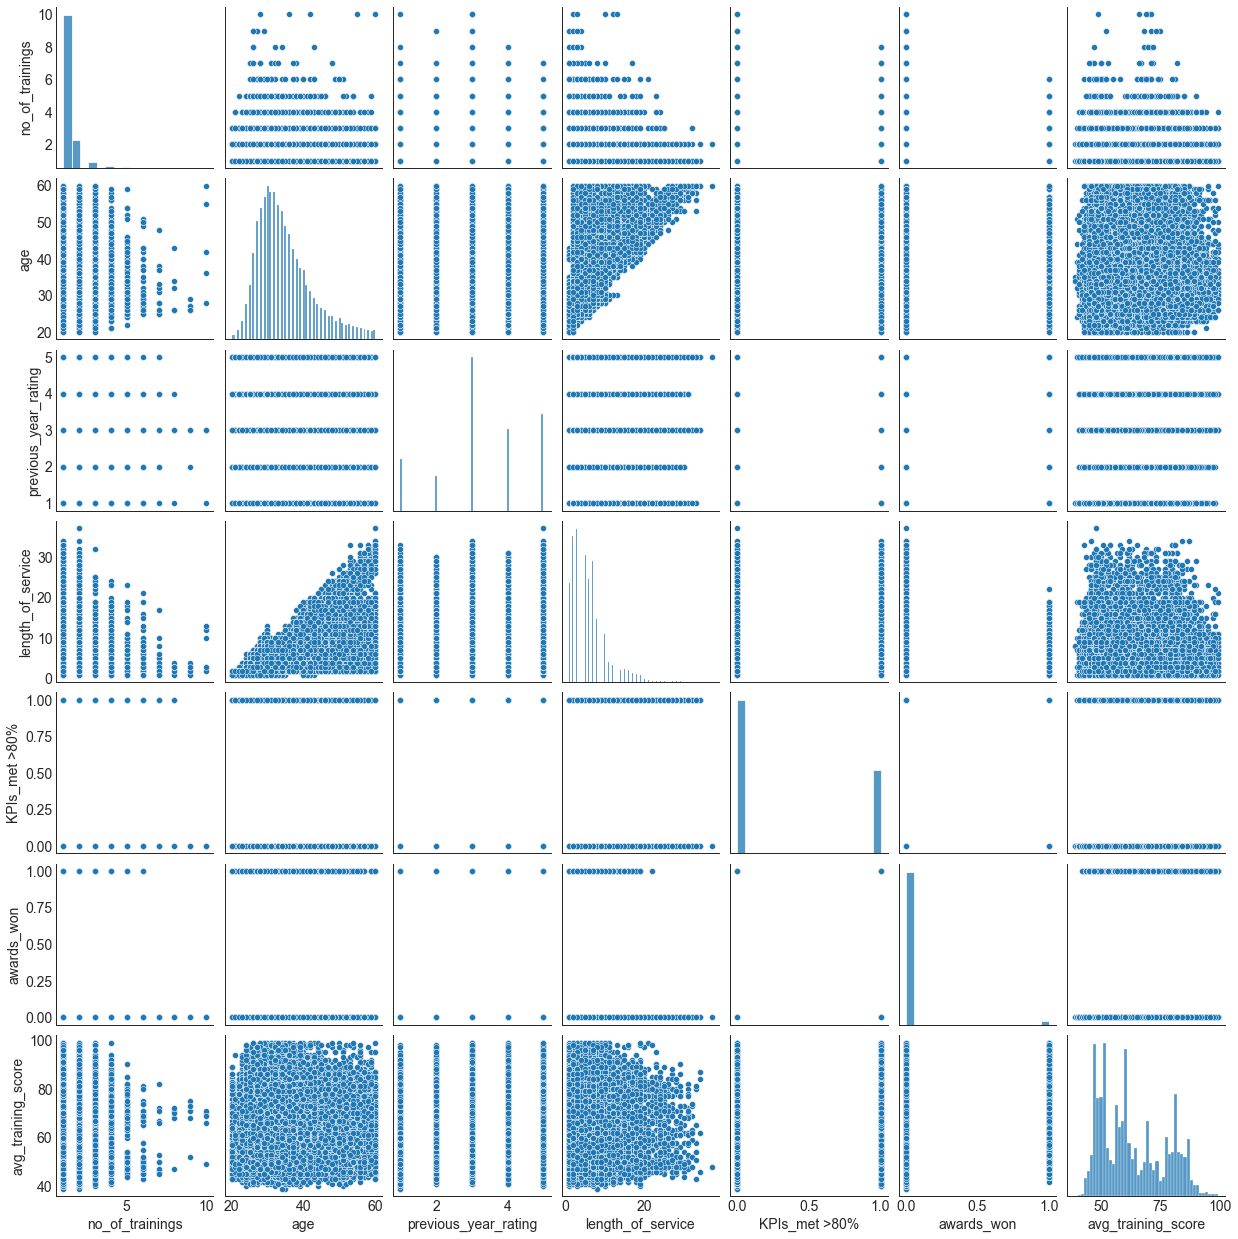

In [13]:
sns.pairplot(train_num.drop('is_promoted', axis = 1), palette =  'PuBu')
plt.show()

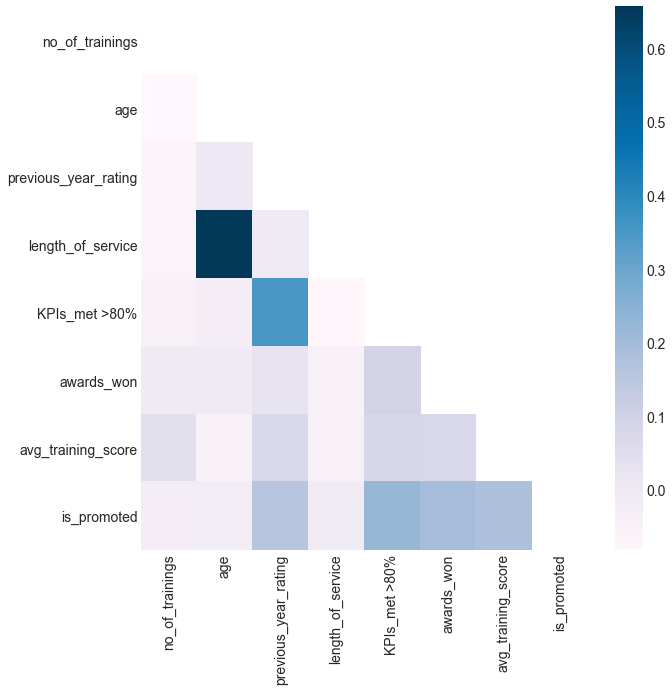

In [14]:
corr = train_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, cmap = 'PuBu')

### Conclusion
After this stage, we can proceed to a detailed examination of each individual feature, but before it we need to summarize our graphs:
1. There is a strong correlation between previous year rating, KPI, awards, training score and promotion. We should make an attention to that, when we will built our model. Also I think, we should create a generic productivity score.
2. We have a normal distribution in most of our features, but we have to do normalization in our feature engineering step.

## Separate analysis
Let’s look at the relationship between individual features and promotion. In this step we will explore how features connected with promotion. But we will divide this into logical parts, where we will explore separate parts of our data. 
It will be:
1. Departments and regions
2. Age groups
3. Gender 
4. Education
5. Recruitment channel
6. etc.

### Departments and regions

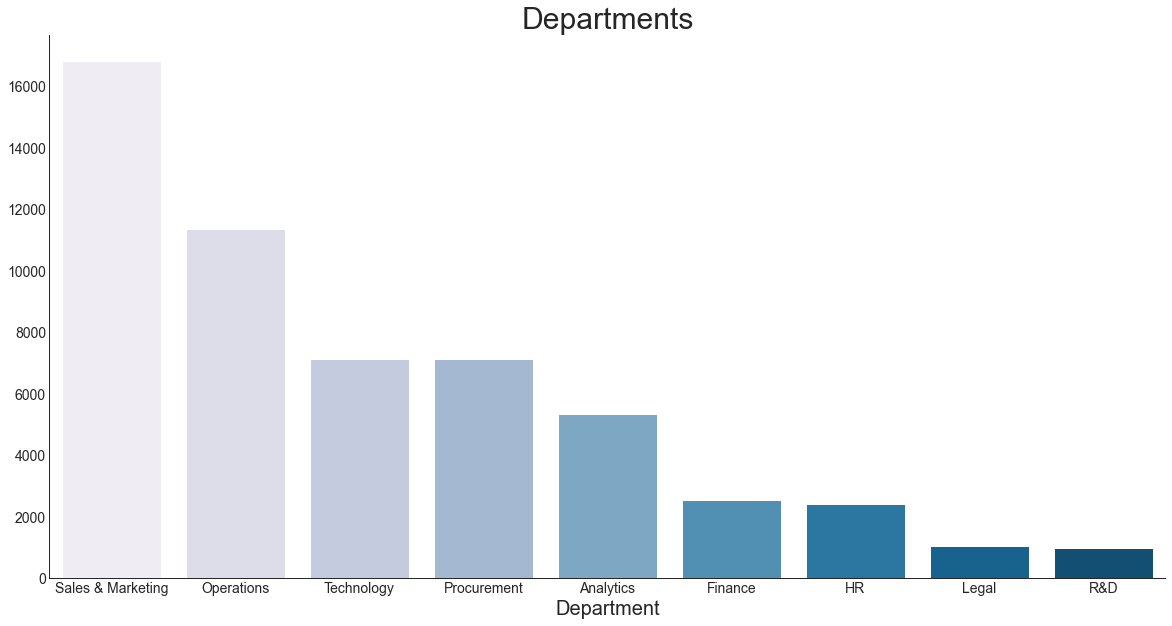

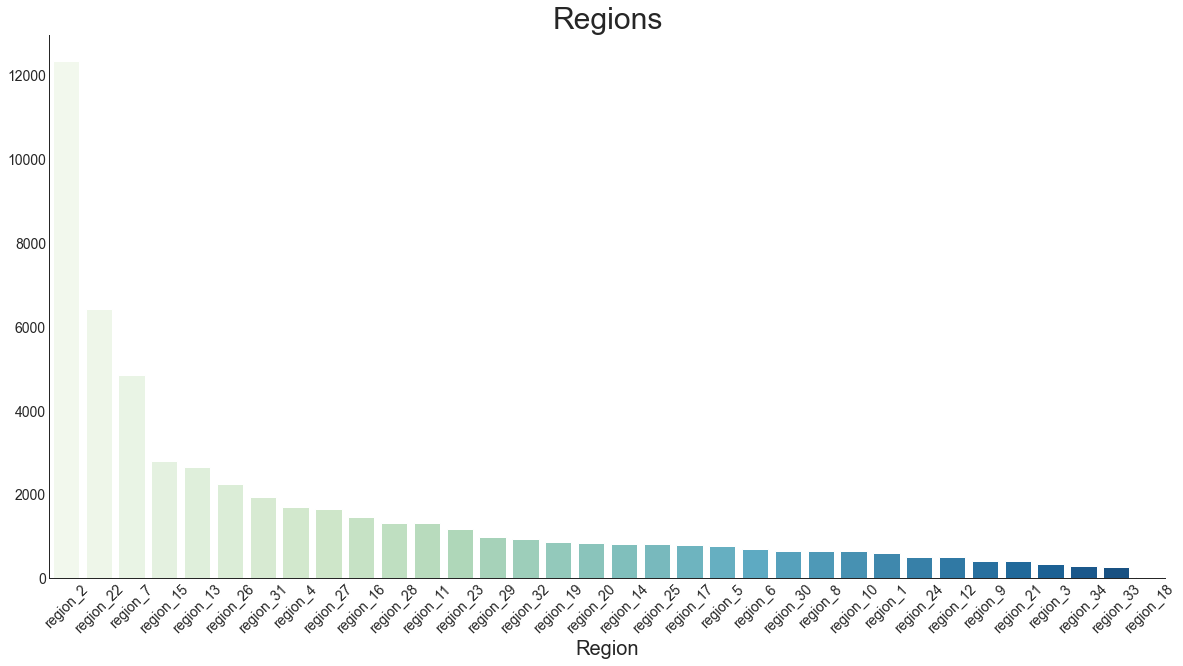

In [15]:
#here we will explore how did people distributed between departments and regions 

#department plotting
department_plot = plt.subplots(figsize=(20, 10))
department_plot = sns.countplot(x = 'department', 
              data = train,
               palette= 'PuBu', 
              order = train['department'].value_counts().index)

sns.despine()
department_plot.set_xlabel('Department', fontsize = 20)
department_plot.set_ylabel('')
department_plot.set_title('Departments', fontsize = 30)
plt.show()


#region plotting
region_plot = plt.subplots(figsize=(20, 10))
region_plot = sns.countplot(x = 'region', 
              data = train,
               palette= 'GnBu', 
              order = train['region'].value_counts().index)

sns.despine()
region_plot.set_xlabel('Region', fontsize = 20)
region_plot.set_ylabel('')
region_plot.set_title('Regions', fontsize = 30)
plt.xticks(rotation=45)
plt.show()

#this graphs is very important to us, because it shows us how company working and how many people
#employed in each department and region

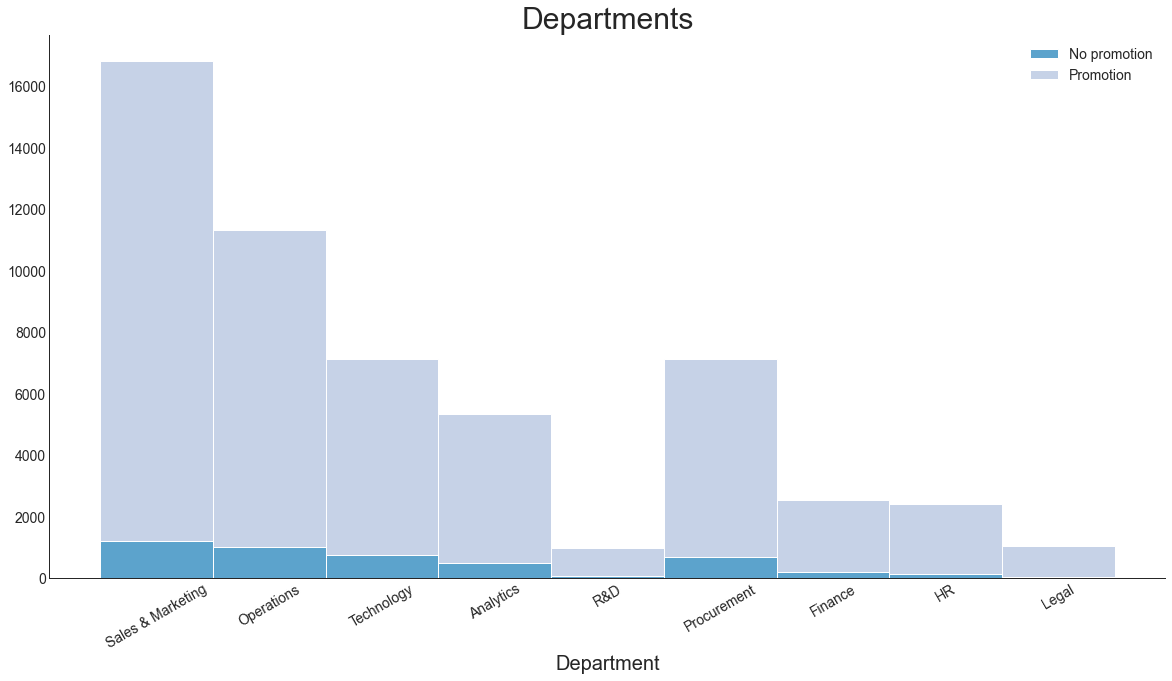

In [16]:
department_prom = plt.subplots(figsize=(20, 10))
department_prom = sns.histplot(
    x = 'department',
    hue = 'is_promoted',
    data = train,
    palette= 'PuBu',
    multiple="stack"
)

sns.despine()

department_prom.set_xlabel('Department', fontsize = 20)
department_prom.set_ylabel('')
department_prom.set_title('Departments', fontsize = 30)

plt.xticks(rotation=30)
plt.legend(title='', loc='upper right', labels=['No promotion', 'Promotion'])

plt.show()

#here we’ll see how the department affects the promotion, as we can see employees in operations, procurement, technology
#and analytics department usually get more promotions in percentage, it can be useful

### Age groups 
In this part we will look at our age groups, how they connect with promotion and etc.

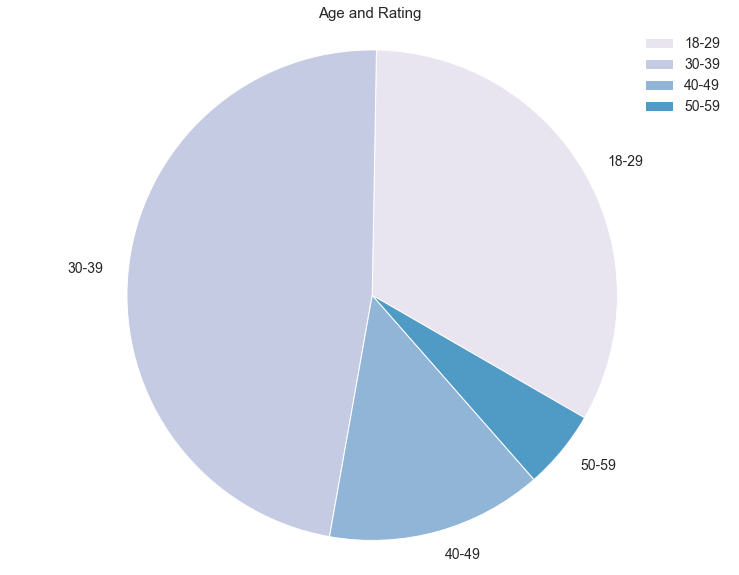

In [17]:
#first of all we should make an attention to age and promotion
#we divided all people in four age groups('18-29', '30-39', '40-49', '50-59') and look how age groups represented

bins = [18, 30, 40, 50, 60]
labels = ['18-29', '30-39', '40-49', '50-59']
train['agerange'] = pd.cut(train.age, bins, labels = labels,include_lowest = True)

agerange = train.agerange.value_counts().to_frame()
agerange = agerange.rename(columns={'index':'age_group', 'agerange':'counts'})
agerange.reset_index()

labels = agerange.index.sort_values().tolist()
sizes = ['18118', '26028', '7810', '2852'] 
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors =sns.color_palette(palette='PuBu'), startangle= -30)
ax1.axis('equal')
plt.legend(title='', loc='upper right', labels= labels)
ax1.set_title('Age and Rating', fontsize = 15)

plt.show()

#so the most large group is 30-39, they represent about 50% of all employees
#lets look how did they connected with promotion

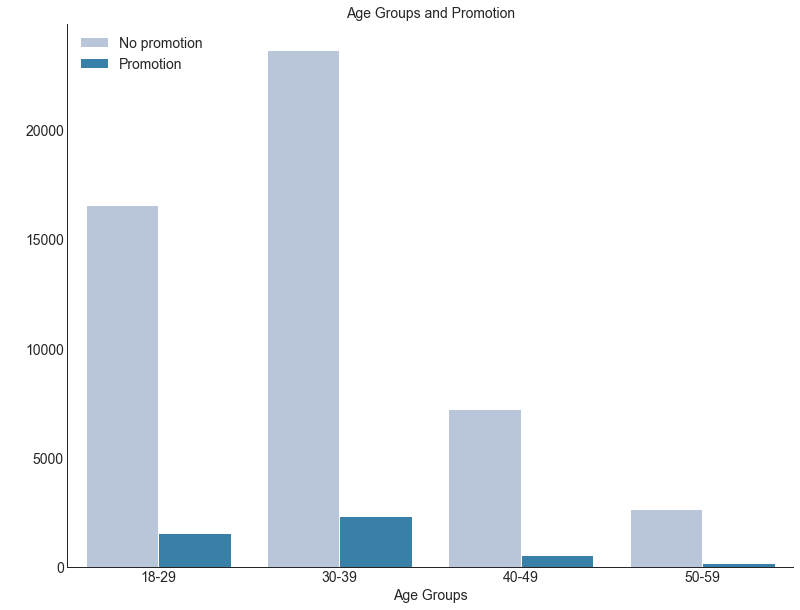

In [18]:
agerange_bar = sns.countplot(
    x = 'agerange', 
    hue = 'is_promoted', 
    palette =  'PuBu', 
    data = train)
sns.despine()
agerange_bar.set(xlabel='Age Groups', ylabel=' ')
agerange_bar.set(title = 'Age Groups and Promotion')
plt.legend(title='', loc='upper left', labels=['No promotion', 'Promotion'])
plt.show()

#as we can see there are two large groups: 18-29 and 30-39, they make up more than 80%(44 of 54 in thousands) of all employees, 
#but they didn't get so much promotions in percentage, we will make an attention to it when we will built our model

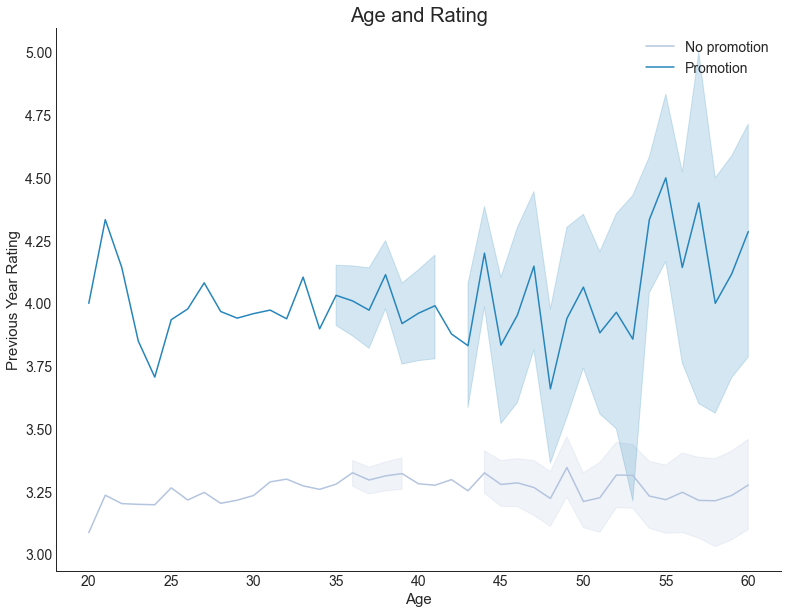

In [32]:
#we also should make an attention to connection between age and rating
sc = sns.lineplot(x = 'age',
                    y = 'previous_year_rating',
                  hue = 'is_promoted',
                    data = train,
                 palette= 'PuBu')
sns.despine()
sc.set_xlabel('Age', fontsize = 15)
plt.legend(title='', loc='upper right', labels=['No promotion', 'Promotion'])
sc.set_ylabel('Previous Year Rating', fontsize = 15)
sc.set_title('Age and Rating', fontsize = 20)
plt.show()

#This plot shows us that rating is very important feature, but there are a lot of outliers, 
#also it shows us how ratings changes with the age of employee

### Gender

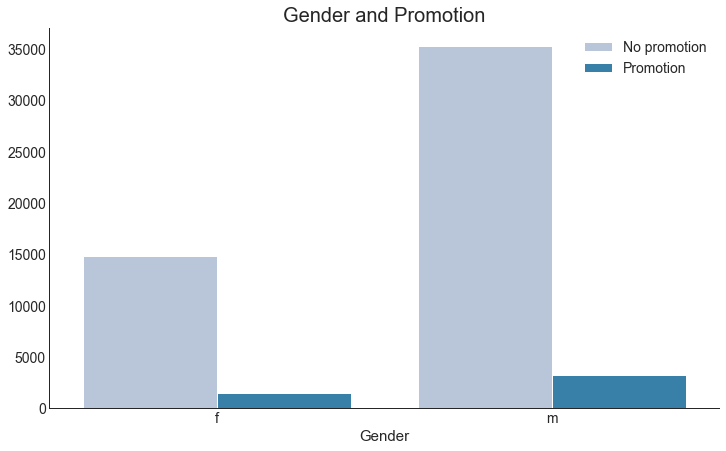

In [20]:
gender = plt.subplots(figsize=(12, 7))
gender = sns.countplot(
    x = 'gender',
    hue = 'is_promoted',
    data = train,
    palette='PuBu'
)

sns.despine()
gender.set_xlabel('Gender', fontsize = 15)
plt.legend(title='', loc='upper right', labels=['No promotion', 'Promotion'])
gender.set_ylabel('', fontsize = 15)
gender.set_title('Gender and Promotion', fontsize = 20)
plt.show()

#in this company only 30% of all employees is female, but they didn't get promotion fewer, than male, but at percentage
#they got more promotions than them

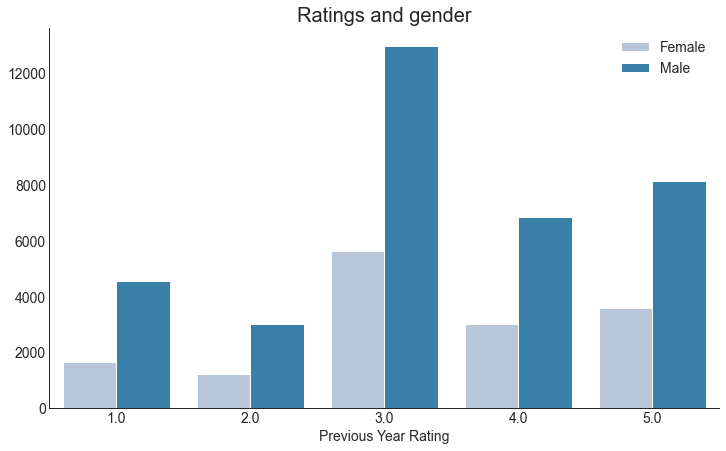

In [21]:
gen_rating = plt.subplots(figsize=(12, 7))
gen_rating = sns.countplot(
    x = 'previous_year_rating',
    data = train,
    hue = 'gender',
    palette= 'PuBu'
)

sns.despine()
gen_rating.set_xlabel('Previous Year Rating')
gen_rating.set_ylabel('')
gen_rating.set_title('Ratings and gender', fontsize = 20)
plt.legend(title='', loc='upper right', labels=['Female', 'Male'])
plt.show()

### Education

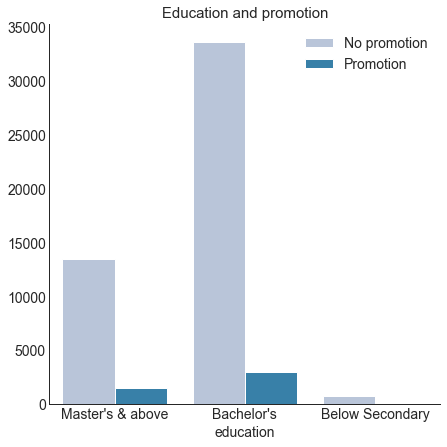

In [22]:
edu = plt.subplots(figsize=(7, 7))

edu = sns.countplot(
    x = 'education',
    hue = 'is_promoted', 
    data = train, 
    palette= 'PuBu'
)

sns.despine()
edu.set_ylabel('')
edu.set_title('Education and promotion', fontsize = 15)
plt.legend(title='', loc='upper right', labels=['No promotion', 'Promotion'])
plt.show()

#it's more interesting, as we can see education have an influence on your promotion
#if you have master's degree and above you have more chance to get a promotion
#and if you doesn't have bachelor degree you have a low chance to get a promotion
#but there is a NaN values, which we should mention

### Recruitment channel

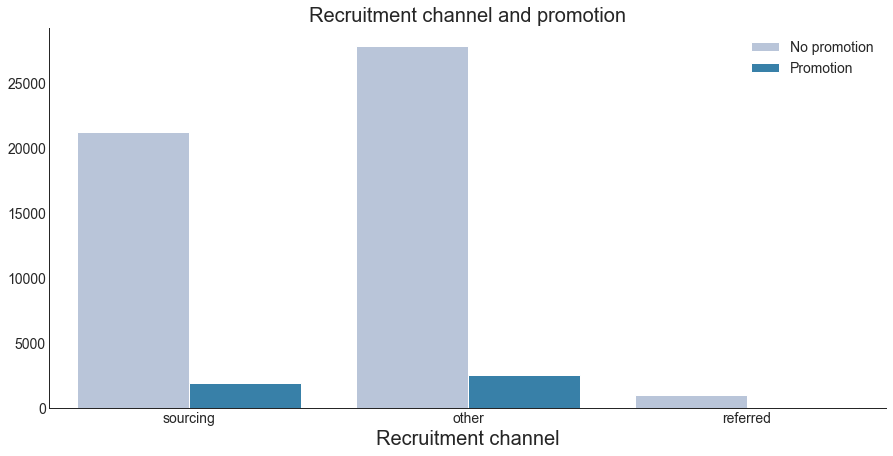

In [23]:
recruitment_channel = plt.subplots(figsize=(15, 7))
recruitment_channel = sns.countplot(
    x = 'recruitment_channel', 
    data = train, 
    hue = 'is_promoted',
    palette='PuBu')

sns.despine()
recruitment_channel.set_ylabel('')
recruitment_channel.set_xlabel('Recruitment channel', fontsize = 20)
recruitment_channel.set_title('Recruitment channel and promotion', fontsize = 20)
plt.legend(title='', loc='upper right', labels=['No promotion', 'Promotion'])
plt.show()

#people from sourcing recruitment channel usually get more promotions,than others

### Other interesting and important plots

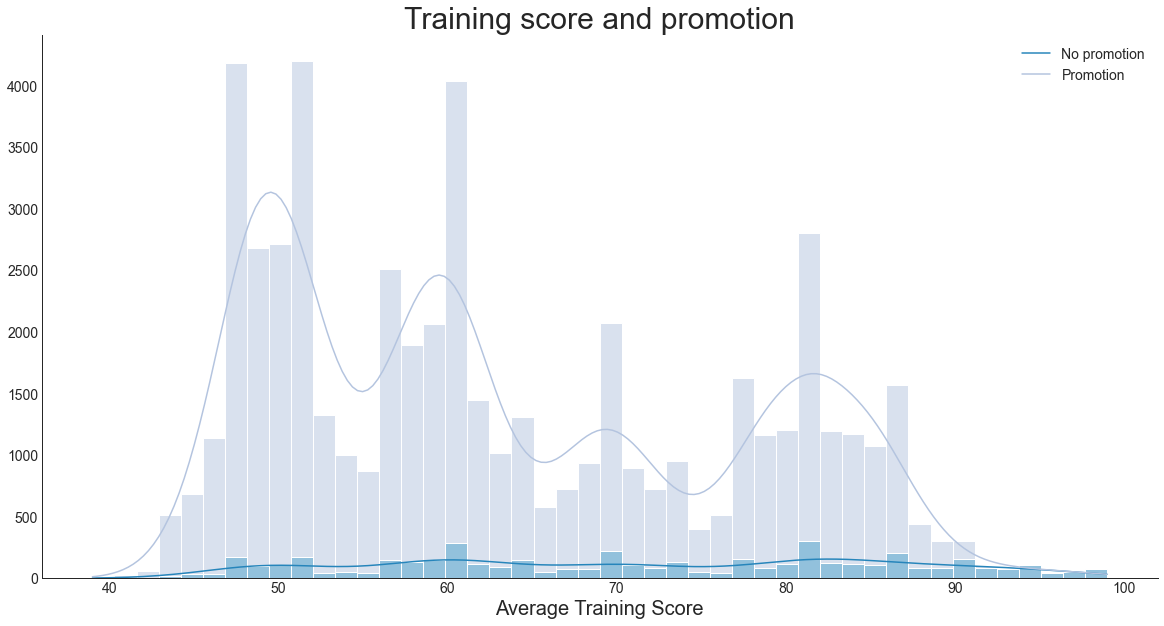

In [24]:
training_score = plt.subplots(figsize=(20, 10))
training_score = sns.histplot(
    x = 'avg_training_score', 
    data = train, 
    kde = True, 
    hue = 'is_promoted',  
    multiple="stack",
    palette='PuBu')

sns.despine()
training_score.set_ylabel('')
training_score.set_xlabel('Average Training Score', fontsize = 20)
training_score.set_title('Training score and promotion', fontsize = 30)
plt.legend(title='', loc='upper right', labels=['No promotion', 'Promotion'])
plt.show()
#as we can see average training score helps in promotion, after 90 points all employees got a promotion

### Conclusion 
Before we started our model building, we have to look on our data and we saw some interesting relations, which we will use in next stage. Let's summarize them:
1. We have a strong relations between rating and promotions, average training score and promotions and etc.
2. There are a lot of outliers, which we should clean before model building.
3. We need one more feature, in my opinion it should be one productivity feature, because there are a lot of disparate features, which we couldn't express in one, such as KPI, rating and training score.